# Import Library

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [3]:
path='./precip.mon.ltm.nc'
ncfile = xr.open_dataset(path)
print(ncfile)

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbitin

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [6]:
precip = ncfile.data_vars['precip']
print(precip.shape)

(12, 72, 144)


In [9]:
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(0)

In [12]:
#global zonal average
precip_global = precip.mean(dim='lon')
#DataArray.mean(dim=None, axis=None, skipna=None, **kwargs)
#more info. https://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html

precip_global.shape
precip_global

<xarray.DataArray 'precip' (time: 12, lat: 72)>
array([[0.08736122, 0.12877572, 0.1435304 , 0.22262907, 0.3425752 ,
        0.53780186, 0.6823492 , 0.8179032 , 1.2664639 , 1.518256  ,
        1.9398144 , 2.4559057 , 2.7869253 , 2.8563201 , 2.6864052 ,
        2.7792127 , 2.8133228 , 2.784026  , 2.5565488 , 2.490122  ,
        2.4335666 , 2.3137636 , 2.3219995 , 2.3324378 , 2.3247488 ,
        2.400073  , 2.5566254 , 2.9862792 , 3.5525043 , 4.3193064 ,
        4.863495  , 5.153807  , 5.5046086 , 5.4831467 , 5.0761466 ,
        4.4785666 , 4.427753  , 4.82041   , 4.1515617 , 2.5960693 ,
        1.4968468 , 1.0315536 , 0.8997023 , 0.8883896 , 0.8634603 ,
        1.0242691 , 1.3377174 , 1.747663  , 2.2618458 , 2.7384496 ,
        3.1299381 , 3.2702816 , 3.252101  , 3.0751934 , 2.7868829 ,
        2.7026439 , 2.5997453 , 2.562912  , 2.6078575 , 2.4963062 ,
        2.128328  , 1.8806163 , 1.6254861 , 1.45306   , 1.0986763 ,
        0.86352426, 0.627309  , 0.46116865, 0.43857896, 0.35936898,
        0.37228954, 0.4047928 ],
       [0.20745839, 0.19111657, 0.18474708, 0.26557404, 0.39793485,
        0.6369974 , 0.86758626, 1.0512834 , 1.5269915 , 1.7684895 ,
        2.2336836 , 2.7603836 , 3.1218042 , 3.1288993 , 2.883004  ,
        2.9165494 , 2.95573   , 2.8787267 , 2.652303  , 2.5892043 ,
        2.5008454 , 2.404438  , 2.3972425 , 2.4314508 , 2.4923375 ,
...
        2.9661505 , 3.2263365 , 3.2956064 , 3.3024793 , 3.0498292 ,
        2.941447  , 2.8760529 , 2.841791  , 2.8603961 , 2.8794057 ,
        2.5209088 , 2.1916482 , 1.8529091 , 1.616425  , 1.2343905 ,
        1.0079643 , 0.7430023 , 0.57791215, 0.52853245, 0.41621166,
        0.35922527, 0.3334676 ],
       [0.07748583, 0.10501129, 0.12692028, 0.1918568 , 0.30679333,
        0.4827448 , 0.6222369 , 0.71368194, 1.0653481 , 1.263422  ,
        1.6424289 , 2.0679033 , 2.3783555 , 2.4346042 , 2.3243375 ,
        2.4170399 , 2.5484097 , 2.6258519 , 2.4545689 , 2.4342089 ,
        2.4192188 , 2.2921324 , 2.243533  , 2.2396321 , 2.246482  ,
        2.2909274 , 2.3615937 , 2.5010123 , 2.8183103 , 3.3719835 ,
        3.920659  , 4.215916  , 4.6509733 , 4.746888  , 4.6208544 ,
        4.188828  , 4.0931525 , 4.97201   , 5.732049  , 4.372799  ,
        2.6026163 , 1.7699999 , 1.4406611 , 1.2287407 , 1.0317569 ,
        1.0745769 , 1.3091019 , 1.6608056 , 2.1307898 , 2.6590433 ,
        3.2183764 , 3.4985602 , 3.4562483 , 3.329258  , 2.9997118 ,
        2.874335  , 2.7790408 , 2.719052  , 2.7061744 , 2.6094081 ,
        2.2600617 , 1.984051  , 1.6812634 , 1.4955636 , 1.1639224 ,
        0.92199284, 0.66254973, 0.4828126 , 0.42071843, 0.3468393 ,
        0.32414544, 0.33901188]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00

In [14]:
precip_global = precip_global.transpose('lat','time')
precip_global

<xarray.DataArray 'precip' (lat: 72, time: 12)>
array([[0.08736122, 0.20745839, 0.42542002, 0.624864  , 0.5563151 ,
        0.44819465, 0.5804927 , 0.63101816, 0.6426464 , 0.52090955,
        0.23690541, 0.07748583],
       [0.12877572, 0.19111657, 0.29414514, 0.40675172, 0.42694578,
        0.41131854, 0.4871012 , 0.53962964, 0.5693148 , 0.43772784,
        0.2554048 , 0.10501129],
       [0.1435304 , 0.18474708, 0.2238867 , 0.3003626 , 0.38165146,
        0.4372995 , 0.4800306 , 0.5128884 , 0.554387  , 0.39075154,
        0.26547238, 0.12692028],
       [0.22262907, 0.26557404, 0.30687377, 0.34762204, 0.4269858 ,
        0.5185851 , 0.54341984, 0.55874014, 0.5886891 , 0.43408746,
        0.33026853, 0.1918568 ],
       [0.3425752 , 0.39793485, 0.4441648 , 0.47107908, 0.54606664,
        0.6566036 , 0.6511279 , 0.65325725, 0.6904645 , 0.5391358 ,
        0.46944624, 0.30679333],
       [0.53780186, 0.6369974 , 0.6289175 , 0.6262209 , 0.70169055,
        0.7776272 , 0.80276626, 0.81210953, 0.8529805 , 0.69608665,
        0.66403747, 0.4827448 ],
       [0.6823492 , 0.86758626, 0.83367145, 0.74744385, 0.78555614,
        0.82585466, 0.8825309 , 0.8900773 , 0.8932671 , 0.79423493,
...
        0.716691  , 0.9994542 , 1.2818074 , 1.2228141 , 1.2355895 ,
        1.0079643 , 0.92199284],
       [0.627309  , 0.5813029 , 0.49052238, 0.46141645, 0.39697906,
        0.60796136, 0.8888299 , 1.1076984 , 1.062839  , 0.9421103 ,
        0.7430023 , 0.66254973],
       [0.46116865, 0.43087122, 0.35923517, 0.35445336, 0.29786962,
        0.50817436, 0.8001678 , 0.9971747 , 0.94785905, 0.7250147 ,
        0.57791215, 0.4828126 ],
       [0.43857896, 0.40246037, 0.30428663, 0.32035774, 0.2872188 ,
        0.47928274, 0.7701239 , 0.93268585, 0.8808506 , 0.62179506,
        0.52853245, 0.42071843],
       [0.35936898, 0.30515042, 0.2175378 , 0.24055178, 0.25017318,
        0.42120138, 0.7215278 , 0.8591506 , 0.78324926, 0.49972862,
        0.41621166, 0.3468393 ],
       [0.37228954, 0.272422  , 0.19196065, 0.20745319, 0.24485837,
        0.41019794, 0.699085  , 0.88868415, 0.8235886 , 0.4828015 ,
        0.35922527, 0.32414544],
       [0.4047928 , 0.2978344 , 0.20378105, 0.22779867, 0.27280417,
        0.43433952, 0.7138104 , 0.9797377 , 0.8683664 , 0.52876705,
        0.3334676 , 0.33901188]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00

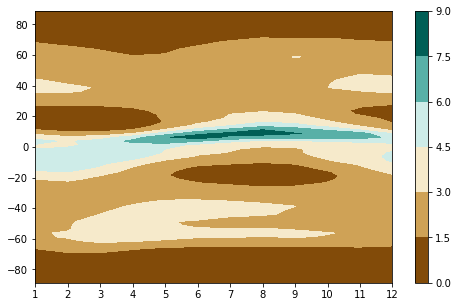

In [25]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows = nrow, ncols =  ncol, figsize=(8,5))

month = [x for x in range(1,13)]
zonalave_fig = ax.contourf(month, precip_global.lat, precip_global, cmap = plt.cm.BrBG)

#x축 간격 1로 설정 하는 방법 두가지
ax.set_xticks(np.arange(1,len(month)+1, 1))
#plt.xticks(np.arange(min(month), max(month)+1, 1.0))

#colorbar 보여주기. 
fig.colorbar(zonalave_fig)
#cbar = plt.colorbar(zonalave_fig)
